In [3]:
# KNN Classification
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [5]:
filename = 'https://raw.githubusercontent.com/mchandak/DS_Repo10/main/Data/pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pd.read_csv(filename, names=names)
dataframe.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
array = dataframe.values
X = array[:, 0:8]
Y = array[:, 8]

In [7]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(X,Y, test_size=0.25,random_state=20)

In [13]:
#Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)     #fit_transform on X_train
x_test = sc.transform(x_test)           #transform on X_test

In [14]:
knn = KNeighborsClassifier(n_neighbors = 10)         #k is hyperparameter
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [15]:
y_pred = knn.predict(x_test)

print(knn.score(x_train, y_train))
print(knn.score(x_test, y_test))


0.7795138888888888
0.7760416666666666


K-fold cross validation

In [17]:
from sklearn.pipeline import make_pipeline
model = KNeighborsClassifier(n_neighbors=10)
clf = make_pipeline(sc, model)
results = cross_val_score(clf,X, Y, cv=10)

In [18]:
results

array([0.72727273, 0.76623377, 0.75324675, 0.68831169, 0.76623377,
       0.72727273, 0.7012987 , 0.79220779, 0.69736842, 0.80263158])

In [19]:
print(results.mean())

0.7422077922077921


### Grid Search for Algorithm Tuning

In [20]:
# Grid Search for Algorithm Tuning
from sklearn.model_selection import GridSearchCV

In [21]:
n_neighbors = np.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)
param_grid

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39])}

In [22]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid,cv=10,scoring='accuracy')
result1=grid.fit(X, Y)

In [23]:
print(grid.best_score_)
print(grid.best_params_)

0.7552973342447027
{'n_neighbors': 17}


### Visualizing the CV results

In [24]:
# search for an optimal value of K for KNN

# range of k we want to try
k_range = range(1, 31)
# empty list to store scores
k_scores = []

#we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, X, Y, cv=10, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())


# k_scores=grid.best_score_
#pd.Series(k_scores).sort_values(ascending=False)

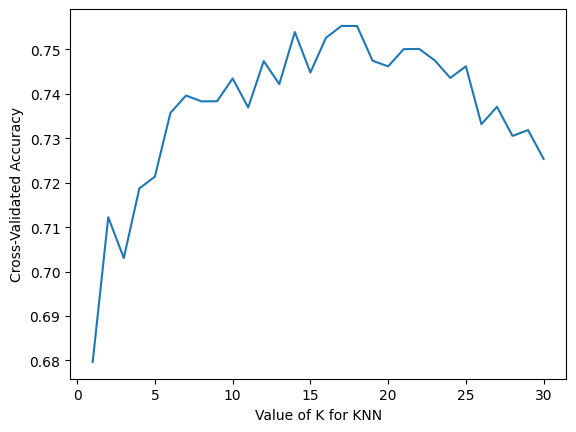

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot to see clearly
plt.plot(k_range, k_scores)

plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [26]:
knn = KNeighborsClassifier(n_neighbors = 17)         #k is hyperparameter
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=17)

In [27]:
y_pred = knn.predict(x_test)

print(knn.score(x_train, y_train))
print(knn.score(x_test, y_test))

0.7847222222222222
0.7760416666666666


In [30]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test,y_pred,labels=[1, 0])
print (cm1)

[[ 36  26]
 [ 17 113]]
